Pratyush Ranjan IMT2019065 <br/>
Archit Sangal IMT2019012

# INSTALLATIONS

## Downloading spacy and medium and large english models

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg

## Downloading Stanford Core NLP

In [ ]:
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar
!unzip /content/stanford-corenlp-4.2.2.zip

## Downloading graphviz for parse tree visualisations

In [3]:
!pip install graphviz

## Defining paths for stanford core nlp

In [4]:
jar_path = '/content/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'
models_jar_path = '/content/stanford-corenlp-4.2.2-models-english.jar'

# IMPORTING NECESSARY PACKAGES

In [5]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from nltk.parse.stanford import StanfordDependencyParser
import networkx as nx
from graphviz import Source
import matplotlib.pyplot as plt
from PIL import Image

# SYNCTACTIC PROCESSING

## Dependency Parsing function using Spacy

The function takes two boolean parameters - text, and visualize, to specify output format. Spacy is used for computing the dependency parsing.

In [6]:
def spacy_parser(sentence, text=True, visualize=False):
    nlp = spacy.load('en_core_web_md')

    doc = nlp(sentence)
    
    if text:
        print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
        print ("-" * 70)
        for token in doc:
            print ("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
    if visualize:
        displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Example parse on the sentence - "Indian stocks are starting to rise again after the great economic slump due to the pandemic". The output displays various tokens, their head, the ROOT and the child nodes of various heads obtained through dependency parsing. The output is displayed in the text format.



In [47]:
spacy_parser('Indian stocks are starting to rise again after the great economic slump due to the pandemic')

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Indian          | amod     | stocks          | []                  
stocks          | nsubj    | starting        | [Indian]            
are             | aux      | starting        | []                  
starting        | ROOT     | starting        | [stocks, are, rise] 
to              | aux      | rise            | []                  
rise            | xcomp    | starting        | [to, again, after]  
again           | advmod   | rise            | []                  
after           | prep     | rise            | [slump]             
the             | det      | slump           | []                  
great           | amod     | slump           | []                  
economic        | amod     | slump           | []                  
slump           | pobj     | after           | [the, great, economic, due]
due             | prep     | slump    

Example parse on the same sentence using visualization. The figure shows various token heads with arrows pointing to its child nodes along with the appropriate dependency relation.

In [48]:
spacy_parser('Indian stocks are starting to rise again after the great economic slump due to the pandemic', text=False, visualize=True)

Token           | Relation | Head            | Children            
----------------------------------------------------------------------


## Dependency parsing and POS tagging function with Stanford NLP.

### In the section, Standford NLP is used for dependency parsing and POS tagging of the heads and dependents in the parse tree.

In [6]:
def stanford_parser(sentence, text=True):
    parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)
    result = parser.raw_parse(sentence)
    dependency = result.__next__()

    if text:
        print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
        print ("-" * 75)

        for dep in list(dependency.triples()):
            print("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))
    
    return dependency

### Example parse on the sentence - "Indian stocks are starting to rise again after the great economic slump due to the pandemic" using Stanford NLP.

In [38]:
stanford_parser('Indian stocks are starting to rise again after the great economic slump due to the pandemic')

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
starting        | VBG        | nsubj      | stocks          | NNS       
stocks          | NNS        | amod       | Indian          | JJ        
starting        | VBG        | aux        | are             | VBP       
starting        | VBG        | xcomp      | rise            | VB        
rise            | VB         | mark       | to              | TO        
rise            | VB         | advmod     | again           | RB        
rise            | VB         | obl        | slump           | NN        
slump           | NN         | case       | after           | IN        
slump           | NN         | det        | the             | DT        
slump           | NN         | amod       | great           | JJ        
slump           | NN         | amod       | economic        | JJ        
slump           | NN         | nmod       | p

### The following two cells demostrate how dependency parsing resolves the POS of a token. Some token can be used as a noun in some cases and verbs in some other cases. In the example there are two sentecnces - 1. "Google stocks are rolling out this week" 2. "If you google stock market you will get the news about the recent crash". In the first sentence, Google acts as as Noun. Whereas in the second sentence, google acts like a verb. In the following two cells, it is demonstrated how dependency parsing through Stanford NLP resolves the real POS of google.

1. Google acting as noun. Dependency parse output correctly assigns NNP POS to Google.

In [42]:
stanford_parser('Google stocks are rolling out this week')

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
rolling         | VBG        | nsubj      | stocks          | NNS       
stocks          | NNS        | compound   | Google          | NNP       
rolling         | VBG        | aux        | are             | VBP       
rolling         | VBG        | compound:prt | out             | RP        
rolling         | VBG        | obl:tmod   | week            | NN        
week            | NN         | det        | this            | DT        


2. google acts as verb. Dependency parse output correctly assigns VB POS to google.

In [43]:
stanford_parser('If you google stock market you will get the news about the recent crash')

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
get             | VB         | advcl      | google          | VB        
google          | VB         | mark       | If              | IN        
google          | VB         | nsubj      | you             | PRP       
google          | VB         | obj        | market          | NN        
market          | NN         | compound   | stock           | NN        
get             | VB         | nsubj      | you             | PRP       
get             | VB         | aux        | will            | MD        
get             | VB         | obj        | news            | NN        
news            | NN         | det        | the             | DT        
get             | VB         | obl        | crash           | NN        
crash           | NN         | case       | about           | IN        
crash           | NN         | det        | t

## Function to visualize the parse tree obtained from Stanford NLP. Using nx graphs for the same.

In [8]:
def nx_graph(sentence, figsize):
    dependency_graph = stanford_parser(sentence, text=False).nx_graph().reverse()

    words = sentence.split(' ')
    nx_labels = {i+1 : words[i] for i in range(len(words))}

    plt.figure(figsize=figsize)
    nx.draw(dependency_graph, with_labels=True, labels=nx_labels, node_size=2500, node_color='#B5EAD7', font_size=10)

Dependency parsing on the sentence - "Google stocks are rolling out this week".

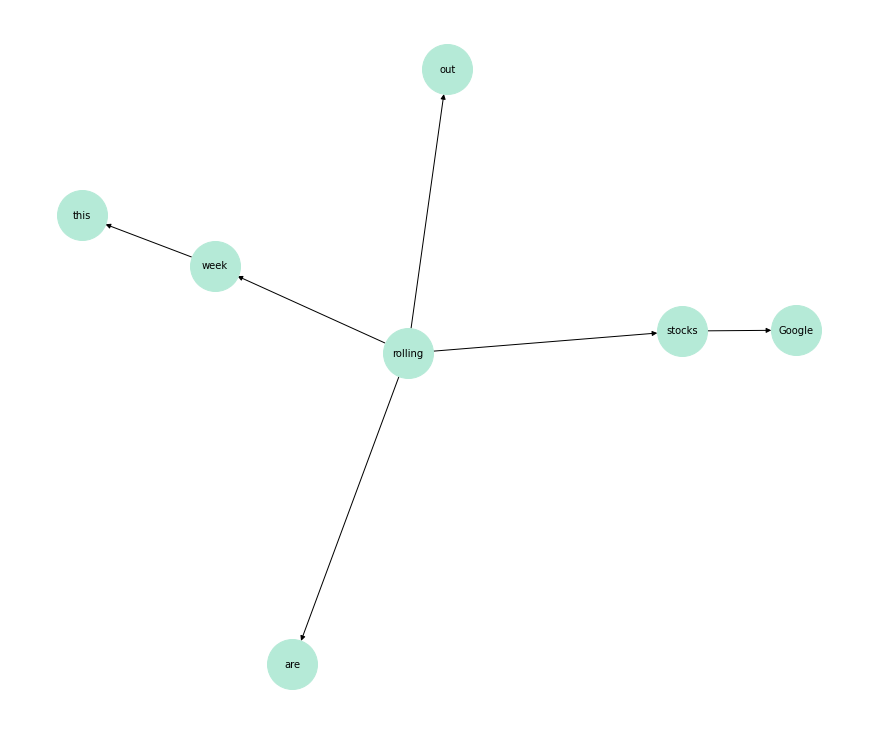

In [68]:
nx_graph('Google stocks are rolling out this week', figsize=(12,10))

Dependency parse on a longer sentence - "Indian stocks are starting to rise again after the great economic slump due to the pandemic".

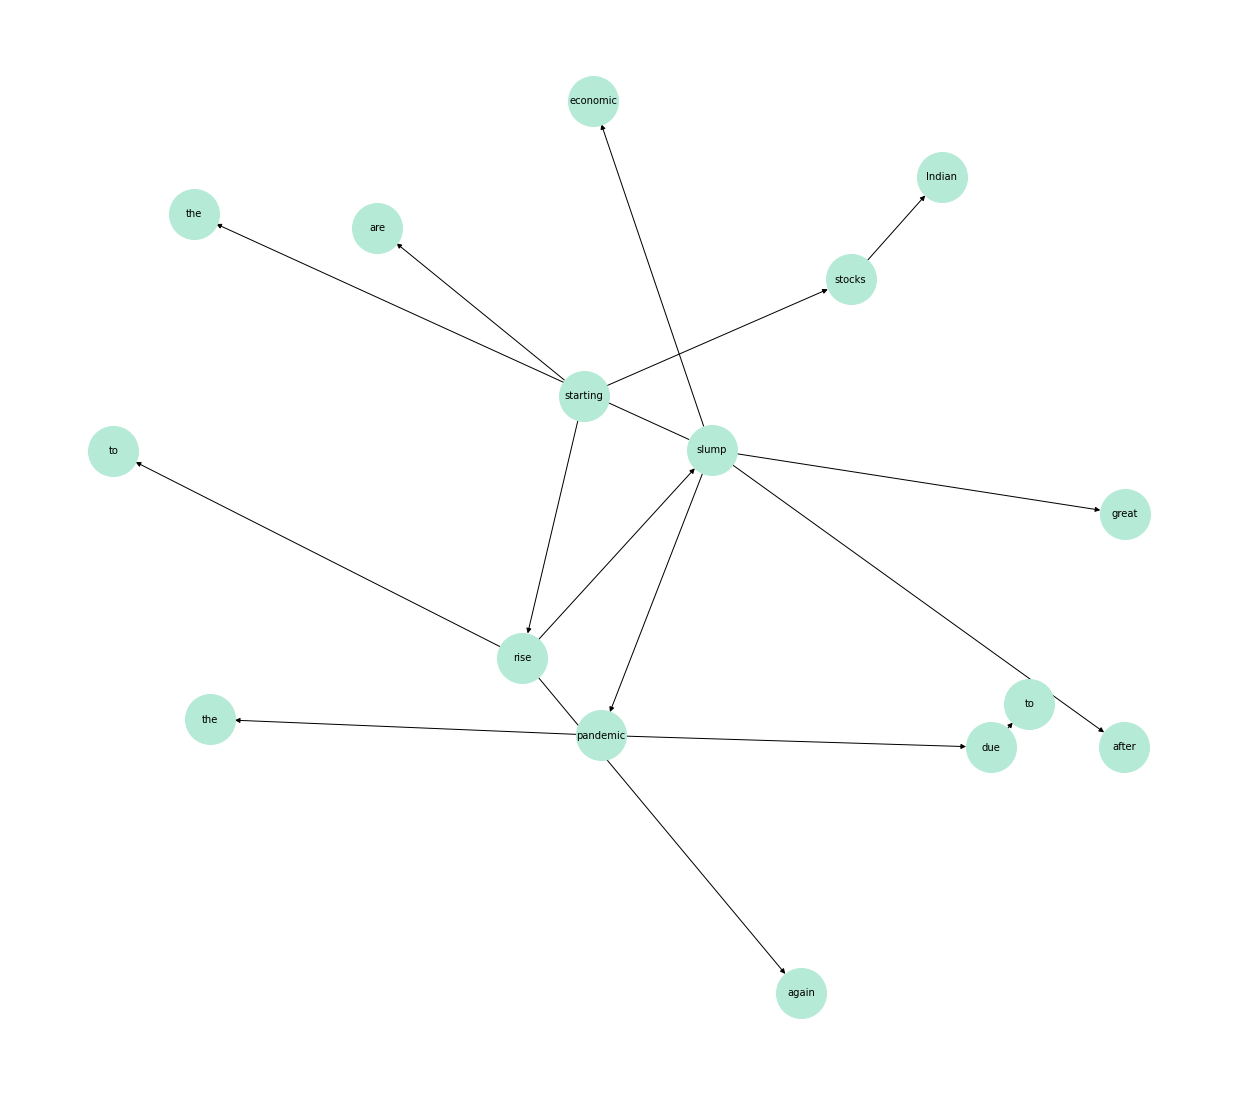

In [72]:
nx_graph('Indian stocks are starting to rise again after the great economic slump due to the pandemic', figsize=(17,15))

## Visualising dependency graph in a tree like structure (Dot Graphs).

The nodes along the edges represent the dependee and the dependent. The edge shows information about the dependency relation. The root node is also specified.

sentence: Indian stocks are starting to rise again after the great economic slump due to the pandemic


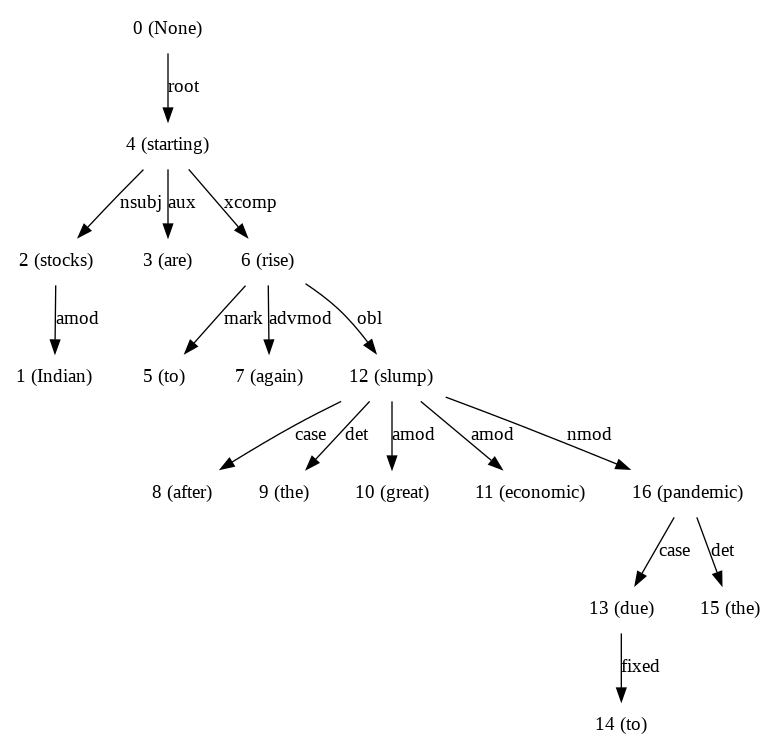

In [83]:
sentence = 'Indian stocks are starting to rise again after the great economic slump due to the pandemic'
dot_def = stanford_parser(sentence, text=False).to_dot()

img = Image.open('/content/dependency_graph.png')
print(f'sentence: {sentence}')
display(img)

## Coreference Resolution using Deep Learning based NeuralCoref

### Uninstalling spacy and neuralcoref (if present) to have a clean installation. 

In [10]:
!pip uninstall spacy
!pip uninstall neuralcoref

Found existing installation: spacy 3.3.0
Uninstalling spacy-3.3.0:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.7/dist-packages/spacy-3.3.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/spacy/*
Proceed (Y/n)? y
  Successfully uninstalled spacy-3.3.0


### NeuralCoref 4.0 is supported on a lower version of Spacy = 2.1.0.

In [ ]:
!pip install spacy==2.1.0
!pip install neuralcoref --no-binary neuralcoref

### Downloading the large version of spacy english model

In [12]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.9/826.9 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_lg: filename=en_core_web_lg-2.1.0-py3-none-any.whl size=828255062 sha256=f5819b00883fc6cd78ee47ac00b3ea036275f318dc63e9663c7117d94dac8561
  Stored in directory: /tmp/pip-ephem-wheel-cache-lhb_m962/wheels/83/c8/3b/6640ce3755cb98381fbf391ba5fc279eac813321c316d8c7ee
Successfully built en_core_web_lg
  Attempting uninstall: en_core_web_lg
    Found existing installation: en-core-web-lg 3.3.0
    Uninstalling en-core-web-lg-3.3.0:
      Successfully uninstalled en-core-web-lg-3.3.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [37]:
import spacy
import neuralcoref
import en_core_web_lg

### Loading spacy's large english model and adding neuralcoref to the pipeline

In [38]:
nlp = en_core_web_lg.load()
neuralcoref.add_to_pipe(nlp)

### Creating a function that returns the clusters from a sentence after performing coreference resolution using neuralcoref

In [55]:
def coref_clusters(sentence):
    doc = nlp(sentence)
    for ent in doc.ents:
        if ent._.coref_cluster is not None:
            print(ent._.coref_cluster)

### Coreference Resolution example

In the following sentence - "David bought a five percent share in the comapany. It has been an amazing experience so far, said he.", the 'he' in the end refers to David which is the first word in the sentence. They are sperated by a total of 19 tokens. However using corefernece resolution, 'he' is identified as a reference to David, as shown in the output.

In [61]:
coref_clusters('David bought a five percent share in the comapany. It has been an amazing experience so far, said he.')

David: [David, he]


References

1. NeuralCoref. Hugging Face. [GitHub](https://github.com/huggingface/neuralcoref.git)

2. Stanford NLP. [GitHub](https://stanfordnlp.github.io/CoreNLP/)